# PREDICTING CREDIT USING DIFFERENT MODELS 

This is end to end data science project aim to predict credict with different models including logistic regression and decision tree

## IMPORT LIBRARIES 

In [1]:
import warnings 

import pandas as pd # to be used in data wrangling 
import numpy as np # for some maths calculation
import seaborn as sns # for visualization 
import matplotlib.pyplot as plt # another tool for visualization 
from sklearn.preprocessing import StandardScaler # for standarlization 
from sklearn.model_selection import train_test_split # for spliting the dataset 
from sklearn.impute import SimpleImputer #for removing nan values in our model
from category_encoders import OneHotEncoder # for hot encoding 
from sklearn.linear_model import LogisticRegression # logistic regression model
from sklearn.pipeline import make_pipeline # for pipelining 
from sklearn.metrics import accuracy_score # for evaluating accuracy 
from sklearn.tree import DecisionTreeClassifier # decision tree model

warnings.filterwarnings ("ignore") 

## PREPARE DATA

In [2]:
#load dataset in jupyter notebook 
dataset = pd.read_csv('crx.data',header=None,delimiter=',')
dataset 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


In [3]:
# list of columns 
cols = ['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'Citizen', 'ZipCode', 'Income','ApprovalStatus']

In [4]:
#give dataset new columns names
dataset.columns = cols

In [5]:
dataset

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


In [6]:
#checking for missing values 
dataset.replace('?',np.NaN,inplace=True) # replace question mark with nan values 
dataset.isna().sum() # retrieve missing values in dataset 

Gender            12
Age               12
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode           13
Income             0
ApprovalStatus     0
dtype: int64

our dataset contains some missing values in some columns which will be handled lately as move through the project

## EXPLORE DATA 

In [7]:
#checking for dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          678 non-null    object 
 1   Age             678 non-null    object 
 2   Debt            690 non-null    float64
 3   Married         684 non-null    object 
 4   BankCustomer    684 non-null    object 
 5   EducationLevel  681 non-null    object 
 6   Ethnicity       681 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    object 
 9   Employed        690 non-null    object 
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    object 
 12  Citizen         690 non-null    object 
 13  ZipCode         677 non-null    object 
 14  Income          690 non-null    int64  
 15  ApprovalStatus  690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


the information above show that we have different type of data in our dataset including integer, float and string 

### high and low cardinality categorical features in dataset

In [8]:
dataset.select_dtypes('object').nunique()

Gender              2
Age               349
Married             3
BankCustomer        3
EducationLevel     14
Ethnicity           9
PriorDefault        2
Employed            2
DriversLicense      2
Citizen             3
ZipCode           170
ApprovalStatus      2
dtype: int64

Two categorical features have more unique objects (age and zipcode), however for age it might be due to that they recorded it as string instead of float. Therefore we have to convert age column from string to float and drop zipcode column 

In [9]:
# drop zipcode column and convert age column
dataset.drop(columns=['ZipCode'],axis=1,inplace=True)


In [10]:
dataset['Age'] = dataset['Age'].astype(float)

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          678 non-null    object 
 1   Age             678 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         684 non-null    object 
 4   BankCustomer    684 non-null    object 
 5   EducationLevel  681 non-null    object 
 6   Ethnicity       681 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    object 
 9   Employed        690 non-null    object 
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    object 
 12  Citizen         690 non-null    object 
 13  Income          690 non-null    int64  
 14  ApprovalStatus  690 non-null    object 
dtypes: float64(3), int64(2), object(10)
memory usage: 81.0+ KB


### Checking for multicollinearity

<AxesSubplot:>

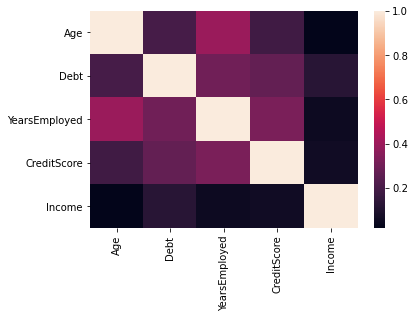

In [12]:
#check for multicollinearity
correlation = dataset.drop('ApprovalStatus',axis=1).corr()
sns.heatmap(correlation)

from the heatmap, we can say that there is no multicollinearity since all the correlation are weak. therefore no column to drop. 


### check the balance in target since we are dealing with binary classification problem 

Text(0.5, 1.0, 'class balance')

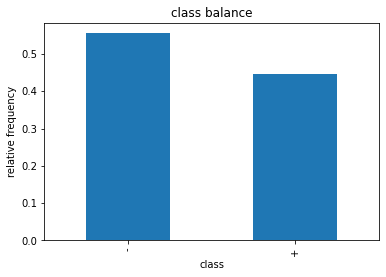

In [13]:
#visualize class balance using bar chart 
dataset['ApprovalStatus'].value_counts(normalize=True).plot(kind='bar')
plt.xlabel('class')
plt.ylabel('relative frequency')
plt.title('class balance')

the bar chart above shows the visualization above. it can be seen that two classes are quite balanced.

#### REMOVE OUTLIERS  

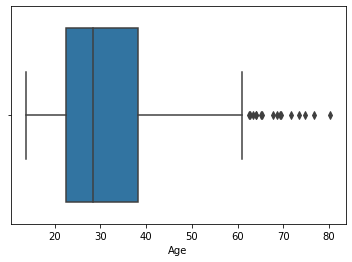

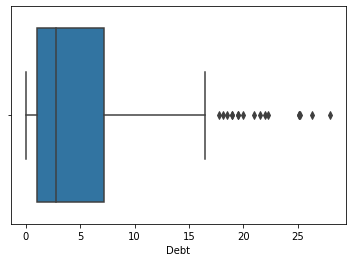

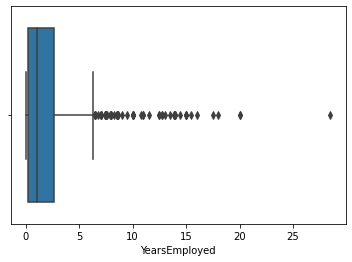

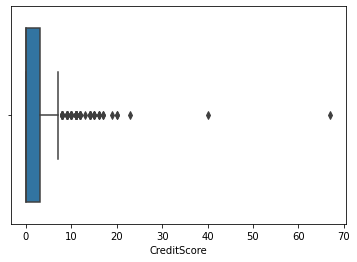

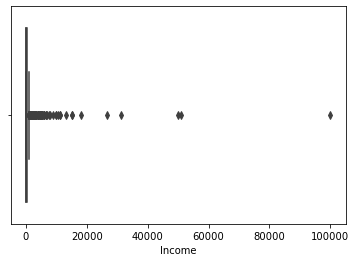

In [14]:
# Checking for outliers 
def box_plot(df,feature):
    sns.boxplot(df[feature])
    plt.show()
    
features = ['Age','Debt','YearsEmployed','CreditScore','Income']
for i in features:
    box_plot(dataset,i)

we can see that some columns have outliers especially for income column. However we can't drop some rows with outliers since we don't have information about the dataset. However we can apply standarlization so that value be in the same range

### Standarlization 

In [15]:
#scaling 
scaler=StandardScaler()
dataset[['Age','Debt','YearsEmployed','CreditScore','Income']] = scaler.fit_transform(dataset[['Age','Debt','YearsEmployed','CreditScore','Income']])


### hot encoding

In [16]:
dataset= pd.get_dummies(dataset,columns=['Gender','Married','BankCustomer','EducationLevel','Ethnicity','PriorDefault','Employed','DriversLicense','Citizen'])


## handling nan values 

since the type of data is float, I used mean to fill nan values

In [17]:
#filling nan values
numerical_cols = ['Age','Debt','YearsEmployed','CreditScore','Income']
for col in numerical_cols:
    dataset[col].fillna(value=dataset[col].mean(), inplace=True)


In [18]:
#check for nan values 
sum(dataset.isnull().sum().values)

0

In [19]:
#independent features and target 
X = dataset.loc[:, dataset.columns != 'ApprovalStatus']
y= dataset['ApprovalStatus']
X.shape

(690, 45)

In [20]:
#splitting dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state=42)

#print out the shape of X-train,y-train,X-test,y-test
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (552, 45)
y_train shape: (552,)
X_test shape: (138, 45)
y_test shape: (138,)


# BUILD MODEL

### Baseline 

In [21]:
# we need to calculate the baseline to compare for our accuracy in training and testing 

accuracy_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(accuracy_baseline, 2))

Baseline Accuracy: 0.57


this baseline accuracy will help us to evaluate our model by comparing it with training accuracy and test accuracy 

### Logistic MODEL

We are going to use simple imputer to remove nan values and onehotencoder to hotencode categorical features 

In [22]:
#fit the model 
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [23]:
acc_train = accuracy_score(y_train,model.predict(X_train))
acc_test = accuracy_score(y_test,model.predict(X_test))

print("Training Accuracy:", round(acc_train, 2))
print("Test Accuracy:", round(acc_test, 2))

Training Accuracy: 0.9
Test Accuracy: 0.82


as we can see that even if all the accuracy are high than baseline, but the model shows overfitting since it fails to generalize in testing result. We can use hyperameter tuning

### Decision Tree

In [24]:
model_2 = DecisionTreeClassifier(random_state=42)
model_2.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [25]:
acc_train_2 = accuracy_score(y_train,model_2.predict(X_train))
acc_test_2 = accuracy_score(y_test,model_2.predict(X_test))

print("Training Accuracy:", round(acc_train_2, 2))
print("Test Accuracy:", round(acc_test_2, 2))

Training Accuracy: 1.0
Test Accuracy: 0.75


we can see that there is a huge gap between training and testing, thus overfitting,we need to loop through different parameters of decision tree

# hypeparameters Tuning

### let us test for different depth size 

In [26]:
max_depth = range(1,50,2)

maximum depth is a powerful parameter of decision tree, therefore to loop into through it 

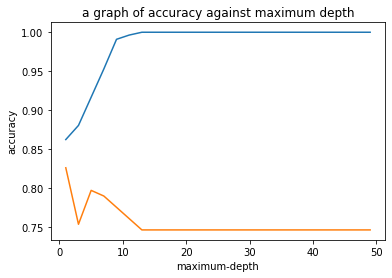

In [27]:
#creating list 
training_acc = []
testing_acc = []

for d in max_depth:
    # Create model with `max_depth` of `d`
    test_model = DecisionTreeClassifier(max_depth=d,random_state=42)
    # Fit model to training data
    test_model.fit(X_train, y_train)
    # Calculate training accuracy score and append to `training_acc`
    training_acc.append(accuracy_score(y_train,test_model.predict(X_train)))
    # Calculate validation accuracy score and append to `testing_acc`
    testing_acc.append(accuracy_score(y_test,test_model.predict(X_test)))

plt.plot(max_depth,training_acc,label='Training')
plt.plot(max_depth,testing_acc,label='Testing')
plt.ylabel('accuracy')
plt.xlabel('maximum-depth')
plt.title('a graph of accuracy against maximum depth')
plt.show()

the graphs shows the accuracy of training and test, it can be seen that with low depth size the model tend to not be overfitted. let's prune our tree model 

In [28]:
#prune and fit the decision tree model
model_prune = DecisionTreeClassifier(max_depth =1, random_state=42)
model_prune.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=1, random_state=42)

In [40]:
#find the training accuracy and test accuracy 
acc_train_prune = accuracy_score(y_train,model_prune.predict(X_train))
acc_test_prune = accuracy_score(y_test,model_prune.predict(X_test))

print("Training Accuracy:", round(acc_train_prune, 2))
print("Test Accuracy:", round(acc_test_prune, 2))

Training Accuracy: 0.86
Test Accuracy: 0.83


we can see that there is no huge gap between training and test accuracy, so we can take decision tree